In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy.random as npr
from numba import jit,  njit, float64

from math import pi, cos, sin
tau = 2*pi

In [17]:
bounds=[[0.,tau/8],[3*tau/8,tau/2]]

In [23]:
@njit
def random_disjoint_intervals(bounds):
    lens = collapse_intervals(bounds)
    total_len=lens[-1]
    
    R=npr.rand()*total_len
    
    idx=0
    for i in range(len(bounds)):
        if R <= lens[i]:
            idx = i
            break
    lb = bounds[idx][0]
    ub = bounds[idx][1]
    R_star = (ub-lb)*npr.rand()+lb
    return R_star

@njit
def collapse_intervals(bounds):
    lens=[]
    for i in range(len(bounds)):
        lb=bounds[i][0]
        ub=bounds[i][1]
        lens.append(ub-lb)
    lens=np.array(lens)
    return lens.cumsum()

def check_bound(v,bound:)
    '''
    checks a single value against its bounds, and returns 
    the closest bound if it's in violation 
    '''
    for b in bound:
        if v>=b[0] and v<=b[1]:
            return v
    return min([(abs(x-v),x) for x in bound.flatten()])[1]

def ensure_bounds(psi, bounds):
    new_psi=[]
    for v, bound in zip(psi,bounds):
        new_psi.append(check_bound(v,bound))
    return new_pis

for i in range(10):
    print(check_bounds(i,np.array([[1,1.5],[7.5,9]])))

bounds = {'pos':np.array([[0,0*tau]]),'ang':np.array([[0,1*tau/16],[tau/2-tau/16,tau/2]]),'burn':np.array([[3.2,3.9]])}
print(ensure_bounds([-1,100,4],bounds.values()))

1.0
1
1.5
1.5
1.5
7.5
7.5
7.5
8
9
[0.0, 3.141592653589793, 3.9]


In [25]:
%timeit random_disjoint_intervals(np.array([[0.,3.],[3.5,10.]]))
%timeit check_bounds(10,np.array([[1,1.5],[7.5,9]]))
%timeit ensure_bounds([-1,100,4],bounds.values())

3.56 µs ± 79.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12 µs ± 258 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
24.7 µs ± 706 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


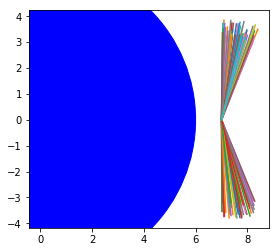

In [5]:
N=10000
bounds={'pos':np.array([[0,0*tau]]),'ang':np.array([[0,1*tau/16],[tau/2-tau/16,tau/2]]),'burn':np.array([[3.2,3.9]])}
pts=[]
for i in range(N):
    newpt=[]
    for b in bounds.values():
        newpt.append(random_disjoint_intervals(b))
    pts.append(newpt)
    
# for i,x in enumerate(np.array(pts).T):
#     plt.hist(x,bins=100)
#     plt.show()
    
ax=plt.gca()
earth=plt.Circle((0,0),6,color='blue')
ax.set_aspect('equal')
for psi in pts[::100]:
    pos,ang,burn=psi
    
    vhat_x,vhat_y=sin(pos),-cos(pos)
    x0,y0 = 7*cos(pos),7*sin(pos)
    burnvx=cos(ang)*vhat_x - sin(ang) * vhat_y
    burnvy=sin(ang)*vhat_x + cos(ang) * vhat_y
    
    
    ax.plot([x0,burn*burnvx+x0],[y0,burn*burnvy+y0])
ax.scatter(0,0) # make sur earth is on screen
ax.add_artist(earth)
plt.show()

In [6]:
bounds.values()

dict_values([array([[0., 0.]]), array([[0.        , 0.39269908],
       [2.74889357, 3.14159265]]), array([[3.2, 3.9]])])

In [7]:
for b in enumerate(bounds.values()):
    print(b)

(0, array([[0., 0.]]))
(1, array([[0.        , 0.39269908],
       [2.74889357, 3.14159265]]))
(2, array([[3.2, 3.9]]))


# Matrix Transformations
## ES algo GPU version

In [36]:
import numpy as np
from scipy.stats import rankdata

In [46]:
indi, jit = 5, 10
sigma,alpha=0.3,0.03
indivs=[[1,1,1],[10,10,10],[100,100,100],[1000,1000,1000],[10000,10000,10000]]
bounds = {'pos':np.array([[0,0*tau]]),'ang':np.array([[0,1*tau/16],[tau/2-tau/16,tau/2]]),'burn':np.array([[3.2,3.9]])}

jitter=np.random.rand(indi,jit,3)
jitter=np.array([sigma*jitt for jitt in jitter])
jitter=jitter.reshape(jit,indi,3)
jitter[0]*=0
points=indivs+jitter
points=points.reshape(jit*indi,3)
points=np.array([p * 2 for p in points]) # TODO replace with ensure_bounds eval
points.reshape(jit,indi,3)
successes=np.zeros(indi*jit,dtype=bool)
scores=np.zeros(indi*jit)

## Simulations are run here

In [47]:
successes[int(indi*jit/2):]=True
print(successes)
scores = np.arange(indi*jit,dtype=float)
for i,_ in enumerate(scores):
    scores[i] += points[i][2]
    if not successes[i]:
        scores[i] += 10
        scores[i] *= 10

successes = successes.reshape(jit,indi)
scores = scores.reshape(indi,jit)
print (scores)
scores = np.array([rankdata(sig_eps,method='ordinal') for sig_eps in scores])
scores = -scores
print(scores)



[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[[1.20000000e+02 3.10000000e+02 2.12000000e+03 2.01300000e+04
  2.00140000e+05 1.70089517e+02 3.62772140e+02 2.17445296e+03
  2.01802097e+04 2.00190654e+05]
 [2.24342254e+02 4.13476324e+02 2.22455972e+03 2.02346044e+04
  2.00244629e+05 2.71691306e+02 4.61238657e+02 2.27243777e+03
  2.02852355e+04 2.00291396e+05]
 [3.20506508e+02 5.15536344e+02 2.32270711e+03 2.03318615e+04
  2.00342670e+05 2.74694555e+01 4.60328305e+01 2.27588895e+02
  2.02823957e+03 2.00292305e+04]
 [3.22333145e+01 5.14795636e+01 2.32027359e+02 2.03338106e+03
  2.00343508e+04 3.71734802e+01 5.63353109e+01 2.37379787e+02
  2.03835442e+03 2.00393259e+04]
 [4.25302027e+01 6.13112948e+01 2.42577186e+02 2.04307410e+03
  2.

In [48]:
steps=np.zeros([indi,3])
jitterT=jitter.transpose(1,0,2)
print(jitterT,jitterT.shape)
steps=np.array([np.dot(scores[idx],jitterT[idx]) * alpha for idx in range(len(steps))])

[[[0.         0.         0.        ]
  [0.29463418 0.06083339 0.00447583]
  [0.28342008 0.10950551 0.21711271]
  [0.14851496 0.04324694 0.08456531]
  [0.22000246 0.08958971 0.02532539]
  [0.10912922 0.22474221 0.23472777]
  [0.24060831 0.24660642 0.11665723]
  [0.21968161 0.04685372 0.08674009]
  [0.11234862 0.24665833 0.26510137]
  [0.13154403 0.28921871 0.2504476 ]]

 [[0.         0.         0.        ]
  [0.02217364 0.1401503  0.13860701]
  [0.06870446 0.12358118 0.17381618]
  [0.06963688 0.06255661 0.06193287]
  [0.08319541 0.08293945 0.2768172 ]
  [0.28686882 0.09224667 0.01641524]
  [0.14934583 0.02708704 0.23978179]
  [0.29682877 0.03198944 0.16765543]
  [0.17358803 0.08525692 0.15564741]
  [0.05833618 0.05992133 0.13083325]]

 [[0.         0.         0.        ]
  [0.23525546 0.10206519 0.22264823]
  [0.04798678 0.04200766 0.22798579]
  [0.24714216 0.14063487 0.1218885 ]
  [0.27957094 0.09739661 0.13535541]
  [0.19790946 0.09023341 0.2944473 ]
  [0.06527548 0.05775664 0.0136797

In [40]:
myvars=['indi','jit','indivs','jitter','points','successes','scores','steps','scores[0]','jitterT']
for name in myvars:
    shape=''
    if eval(name) is np.array:
        shape=eval(name).shape
    print(f"{name}\n  {eval(name)}, {shape}\n")

indi
  5, 

jit
  10, 

indivs
  [[1, 1, 1], [10, 10, 10], [100, 100, 100], [1000, 1000, 1000], [10000, 10000, 10000]], 

jitter
  [[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.03146649 0.05796197 0.0353344 ]
  [0.00218898 0.17506336 0.23095669]
  [0.22130761 0.18342389 0.16283777]
  [0.04039819 0.18636839 0.06207926]
  [0.17856947 0.29461138 0.2115526 ]]

 [[0.05234378 0.27131451 0.17922369]
  [0.14290346 0.29726721 0.1307958 ]
  [0.19321134 0.09645539 0.13754207]
  [0.20492871 0.05221911 0.04989232]
  [0.04033221 0.14796707 0.17582946]]

 [[0.1968916  0.17164837 0.15188791]
  [0.11091491 0.14135676 0.18967495]
  [0.05313078 0.23077753 0.25957971]
  [0.1865256  0.10487532 0.0286791 ]
  [0.22580344 0.26037774 0.19945781]]

 [[0.11148299 0.16617183 0.1974239 ]
  [0.1343403  0.06981172 0.24151674]
  [0.05670833 0.04032876 0.18399746]
  [0.19025

In [ ]:

b



In [392]:
print(jitter.transpose(1,0,2))

[[[0.         0.         0.        ]
  [0.1280431  0.12180758 0.01018593]
  [0.18669717 0.18058165 0.18075414]]

 [[0.         0.         0.        ]
  [0.03645558 0.26442544 0.18639281]
  [0.01882341 0.11633155 0.13459434]]

 [[0.         0.         0.        ]
  [0.04220892 0.26965698 0.02896902]
  [0.06873238 0.07552495 0.00311146]]

 [[0.         0.         0.        ]
  [0.19940603 0.20497647 0.29552359]
  [0.03876768 0.1418851  0.25727366]]

 [[0.         0.         0.        ]
  [0.02567414 0.03599377 0.1412781 ]
  [0.14153639 0.17431669 0.12801141]]]
